# 1. Import Required Libraries

In [1]:
import pandas as pd 
import re

# 2. Load Dataset

In [2]:
df = pd.read_excel('PAN Number Validation Dataset.xlsx')
# print(df.head(10))
print('Total records = ',len(df))
total_records = len(df)

Total records =  10000


In [3]:
df

,Pan_Numbers
0,VGLOD3180G
1,PHOXD7232L
2,MGEPH6532A
3,JJCHK4574O
4,XTQIJ2330L
...,...
9995,TNGUY429!V
9996,SMMN33673g
9997,NaN
9998,RLAI69795t


# 3. Data Cleaning and Preprocessing

## Convert PAN to string, strip spaces, and make uppercase.

In [4]:
# Data Cleaning
df["Pan_Numbers"] = df['Pan_Numbers'].astype('string').str.strip().str.upper()
# print(df.head(10)

In [5]:
df["Pan_Numbers"].head(10)

0    VGLOD3180G
1    PHOXD7232L
2    MGEPH6532A
3    JJCHK4574O
4    XTQIJ2330L
5    HTJYM3835H
6    YQTAP6661X
7    HVOFE5635Y
8    HYUIJ7902R
9    IDSMT3429E
Name: Pan_Numbers, dtype: string

In [6]:
df["Pan_Numbers"].nunique()

9026

## Handle missing and blank values.

In [7]:
# Replace empty strings with NA and drop missing values
df = df.replace({"Pan_Numbers": ''}, pd.NA).dropna(subset="Pan_Numbers")

In [8]:
print('Total records after cleaning = ', len(df))
print('Unique values = ', df["Pan_Numbers"].nunique())

Total records after cleaning =  9033
Unique values =  9025


## Drop duplicates

In [9]:
df = df.drop_duplicates(subset="Pan_Numbers", keep='first')

In [10]:
print('Total records after removing duplicates = ', len(df))

Total records after removing duplicates =  9025


In [11]:
df.head(10)

,Pan_Numbers
0,VGLOD3180G
1,PHOXD7232L
2,MGEPH6532A
3,JJCHK4574O
4,XTQIJ2330L
5,HTJYM3835H
6,YQTAP6661X
7,HVOFE5635Y
8,HYUIJ7902R
9,IDSMT3429E


## 4. Define Validation Functions
- **Check for adjacent repetition of characters**
- **Check for sequential characters**
- **Validate PAN format using Regex**

In [12]:
def has_adjacent_repitition(pan):
    return any(pan[i] == pan[i+1] for i in range(len(pan)-1))

def is_sequencial(pan):
    return all(ord(pan[i+1]) - ord(pan[i]) == 1 for i in range(len(pan)-1))

def is_valid_pan(pan):
    if len(pan) != 10:
        return False 
    
    if not re.match(r'^[A-Z]{5}[0-9]{4}[A-Z]$', pan):
        return False 
    
    if has_adjacent_repitition(pan):
        return False 
    
    if is_sequencial(pan):
        return False
    
    return True

## 5. Apply Validation on Dataset

In [13]:
df["Status"] = df["Pan_Numbers"].apply(lambda x: "Valid" if is_valid_pan(x) else "Invalid")

df.head(10)

,Pan_Numbers,Status
0,VGLOD3180G,Valid
1,PHOXD7232L,Valid
2,MGEPH6532A,Valid
3,JJCHK4574O,Invalid
4,XTQIJ2330L,Invalid
5,HTJYM3835H,Valid
6,YQTAP6661X,Invalid
7,HVOFE5635Y,Valid
8,HYUIJ7902R,Valid
9,IDSMT3429E,Valid


## 6. Summary of Results

In [14]:
valid_cnt = (df["Status"]=='Valid').sum()
invalid_cnt = (df["Status"]=='Invalid').sum()
missing_cnt = total_records - (valid_cnt + invalid_cnt)

print('Total records = ', total_records)
print('Valid = ', valid_cnt)
print('Invalid = ', invalid_cnt)
print('Missing = ', missing_cnt)

df_summary = pd.DataFrame({
    "TOTAL PROCESSED RECORDS": [total_records],
    "TOTAL VALID COUNT": [valid_cnt],
    "TOTAL INVALID COUNT": [invalid_cnt],
    "TOTAL MISSING PANS": [missing_cnt]
})

df_summary

Total records =  10000
Valid =  3193
Invalid =  5832
Missing =  975


,TOTAL PROCESSED RECORDS,TOTAL VALID COUNT,TOTAL INVALID COUNT,TOTAL MISSING PANS
0,10000,3193,5832,975


## 7. Export Results to Excel
- **Sheet 1:** PAN Validations  
- **Sheet 2:** Summary Report

In [15]:
with pd.ExcelWriter("PAN VALIDATION RESULT.xlsx") as writer:
    df.to_excel(writer, sheet_name="PAN Validations", index=False)
    df_summary.to_excel(writer, sheet_name="SUMMARY", index=False)

## 8. Visualization of PAN Validation Results

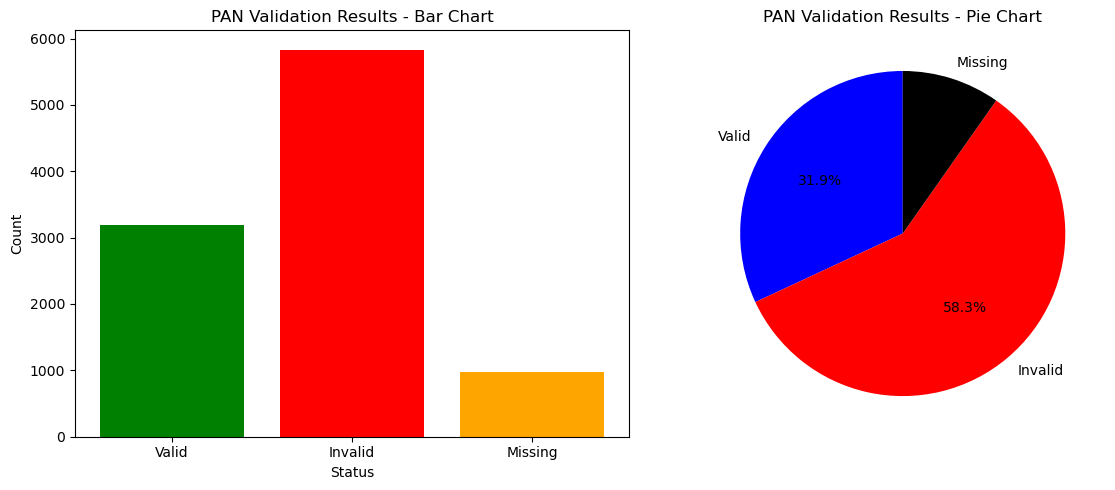

In [23]:
import matplotlib.pyplot as plt

# Data
labels = ['Valid', 'Invalid', 'Missing']
values = [valid_cnt, invalid_cnt, missing_cnt]

# Create figure
plt.figure(figsize=(12,5))

# --- Bar Chart ---
plt.subplot(1,2,1)
plt.bar(labels, values, color=['green','red','orange'])
plt.title("PAN Validation Results - Bar Chart")
plt.xlabel("Status")
plt.ylabel("Count")

# --- Pie Chart ---
plt.subplot(1,2,2)
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue','red','black'])
plt.title("PAN Validation Results - Pie Chart")

plt.tight_layout()
plt.show()